In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the Data

In [96]:
main_df = pd.read_csv("all_data.csv")
main_df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Data Exploration

Initial exploration of the data sets shouws that Chile is the most frequently occuring country. Further investigations simply shows that this is because Chile is alphabetically "first" when compared to the other countries in the data set. All counties have data spanning from 2000 to 2015. Both life expectancy at birth and GDP are reported for each unique country-year pair. 

In [97]:
#Presenting the key summaries for both numerical and categorical data
main_df.describe(include = 'all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [98]:
#understanding the time rang of the data
year_stats = main_df.groupby('Country')['Year'].agg(['min', 'max'])
year_stats

,min,max
Country,,
Chile,2000,2015
China,2000,2015
Germany,2000,2015
Mexico,2000,2015
United States of America,2000,2015
Zimbabwe,2000,2015


Below I am verifying that the data types make sense. 

In [99]:
main_df.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

Below I summarise the data for each country and year. This is of interest because we want to see how GDP and life expectancy change together over time for each country. This relationship isn't very clear from the first simple summary table that I generate. While the below table shows more insight into that relationship, it is still hard to understand because of how many rows it has. This is where data visualization will be a valuable tool in translating the below data into clearer insights.

Initial glances at the data show that over time both GDP and Life expextancy are increasing together. Let's try and explore this relationship some more.

In [100]:
from IPython.display import display

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    result = main_df.groupby(['Country', "Year"])[["Life expectancy at birth (years)", "GDP"]].describe()
    display(result)


Life expectancy at birth (years)            \
                                                         count  mean std   
Country                  Year                                              
Chile                    2000                              1.0  77.3 NaN   
                         2001                              1.0  77.3 NaN   
                         2002                              1.0  77.8 NaN   
                         2003                              1.0  77.9 NaN   
                         2004                              1.0  78.0 NaN   
                         2005                              1.0  78.4 NaN   
                         2006                              1.0  78.9 NaN   
                         2007                              1.0  78.9 NaN   
                         2008                              1.0  79.6 NaN   
                         2009                              1.0  79.3 NaN   
                         2010                              1.0  79.1 NaN   
                         2011                              1.0  79.8 NaN   
                         2012                              1.0  79.9 NaN   
                         2013                              1.0  80.1 NaN   
                         2014                              1.0  80.3 NaN   
                         2015                              1.0  80.5 NaN   
China                    2000                              1.0  71.7 NaN   
                         2001                              1.0  72.2 NaN   
                         2002                              1.0  72.7 NaN   
                         2003                              1.0  73.1 NaN   
                         2004                              1.0  73.5 NaN   
                         2005                              1.0  73.9 NaN   
                         2006                              1.0  74.2 NaN   
                         2007                              1.0  74.4 NaN   
                         2008                              1.0  74.5 NaN   
                         2009                              1.0  74.9 NaN   
                         2010                              1.0  75.0 NaN   
                         2011                              1.0  75.2 NaN   
                         2012                              1.0  75.4 NaN   
                         2013                              1.0  75.6 NaN   
                         2014                              1.0  75.8 NaN   
                         2015                              1.0  76.1 NaN   
Germany                  2000                              1.0  78.0 NaN   
                         2001                              1.0  78.3 NaN   
                         2002                              1.0  78.4 NaN   
                         2003                              1.0  78.5 NaN   
                         2004                              1.0  79.1 NaN   
                         2005                              1.0  79.2 NaN   
                         2006                              1.0  79.6 NaN   
                         2007                              1.0  79.8 NaN   
                         2008                              1.0  79.9 NaN   
                         2009                              1.0  80.0 NaN   
                         2010                              1.0  80.1 NaN   
                         2011                              1.0  80.5 NaN   
                         2012                              1.0  80.6 NaN   
                         2013                              1.0  80.6 NaN   
                         2014                              1.0  80.9 NaN   
                         2015                              1.0  81.0 NaN   
Mexico                   2000                              1.0  74.8 NaN   
                         2001                              1.0  75.0 NaN   
  

# Data Visualizations

Let's start making some visualizations to get a better understanding of the data

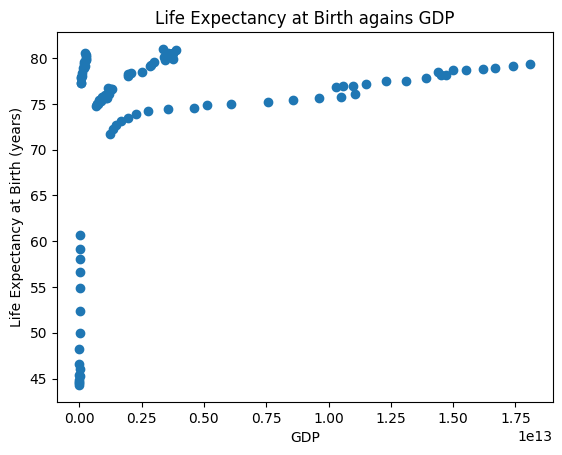

In [101]:
plt.scatter(x = "GDP", y = "Life expectancy at birth (years)", data = main_df)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy at Birth agains GDP")
plt.show()

Initially looks at the graph don't appear very insightly. The country and year of each point are not clear, and it make it hard to understand the data. Let's try and break up the graphs to better understand. 

### Log of GDP

Since GDP is a very top heavy value, let's use log(GDP) to normalize it.

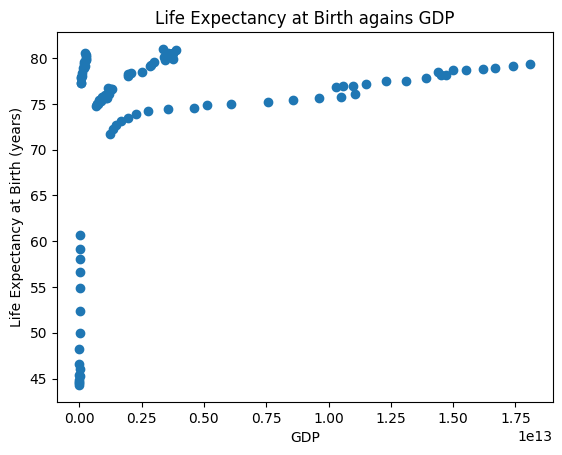

In [102]:
plt.scatter(x = "GDP", y = "Life expectancy at birth (years)", data = main_df)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy at Birth agains GDP")
plt.show()

After taking the log of GDP, some more shapes in the data are clear? Are these countries? 

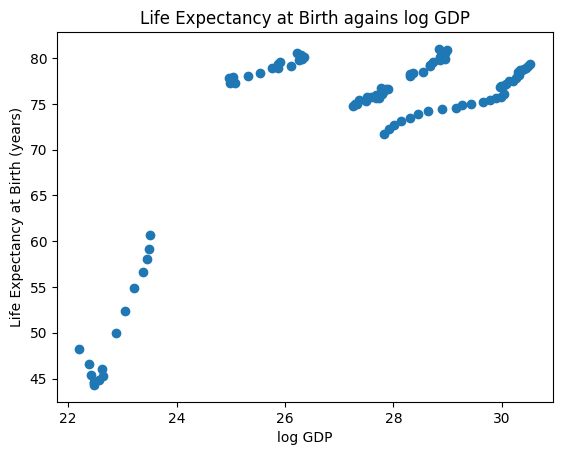

In [103]:

# Ensure 'log GDP' is calculated
main_df['log GDP'] = np.log(main_df['GDP'])

plt.scatter(x = "log GDP", y = "Life expectancy at birth (years)", data = main_df)
plt.xlabel("log GDP")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy at Birth agains log GDP")
plt.show()

Yes! It's very clear that these are separate countries. In fact, the unique country clusters are very distinct and clear! If we want to more understand the relationship between GDP and Life Expectancy at Birth for each country, we can look at each country individually to better understand that relationship.

Initial visualizations also show that Zimbabwe has a very unique relationship between these two variables compared to the other five countries. While the other countries have much clearer linear trends, Zimbabwe has an almost polynomial shape. Let's try and account for year in out visualization. Year might account for Zimbabwe's unique shape. Further visualization can give us some better understanding what kind of linear model we want to build. 

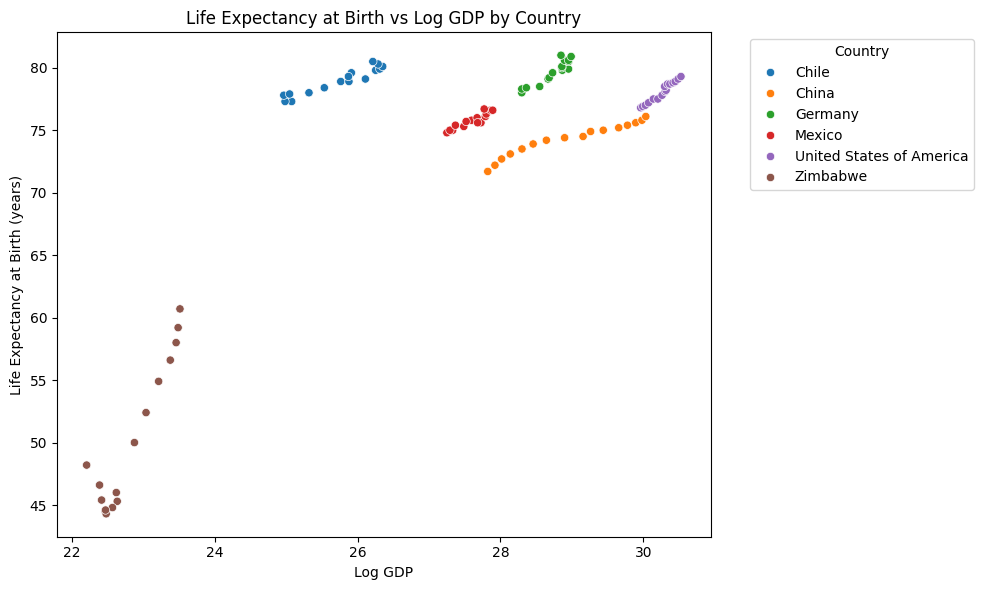

In [104]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='log GDP',
    y='Life expectancy at birth (years)',
    hue='Country',  # Discrete color mapping by Country
    palette='tab10',  # Use a discrete color palette
    data=main_df
)

# Labels and title
plt.xlabel("Log GDP")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy at Birth vs Log GDP by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()


Below I repeated the same graph as above without the log transformation. However, it is apparent that is harder to interpret the below graph, especially for Zimbabwe. As the points are so skewed, the differences in Zimbabwe's data points are not as clear, meaning the relationships observed are the log transformation are not apparent. 

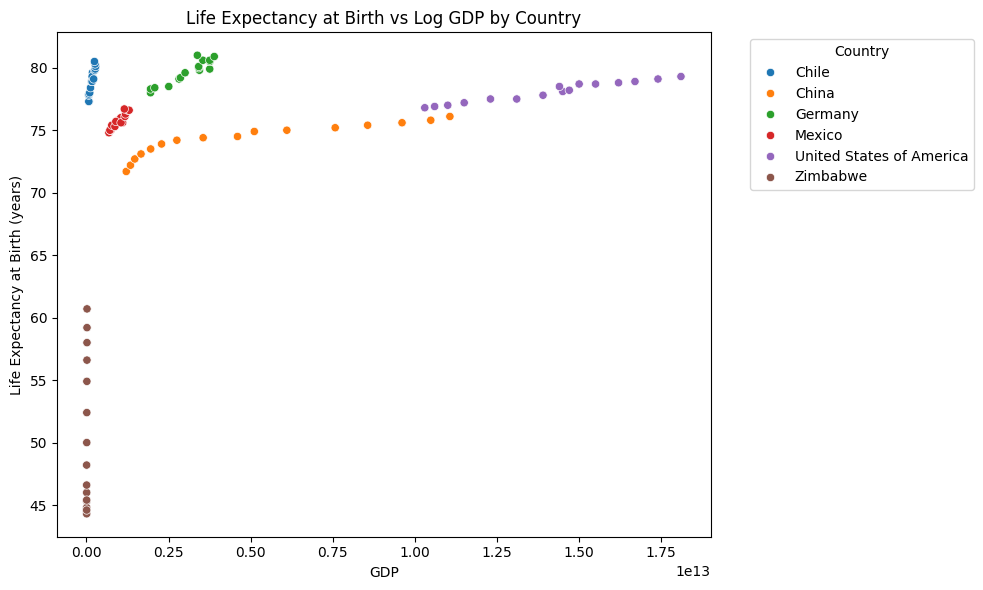

In [105]:

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='GDP',
    y='Life expectancy at birth (years)',
    hue='Country',  # Discrete color mapping by Country
    palette='tab10',  # Use a discrete color palette
    data=main_df
)

# Labels and title
plt.xlabel("GDP")
plt.ylabel("Life Expectancy at Birth (years)")
plt.title("Life Expectancy at Birth vs Log GDP by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()
plt.show()


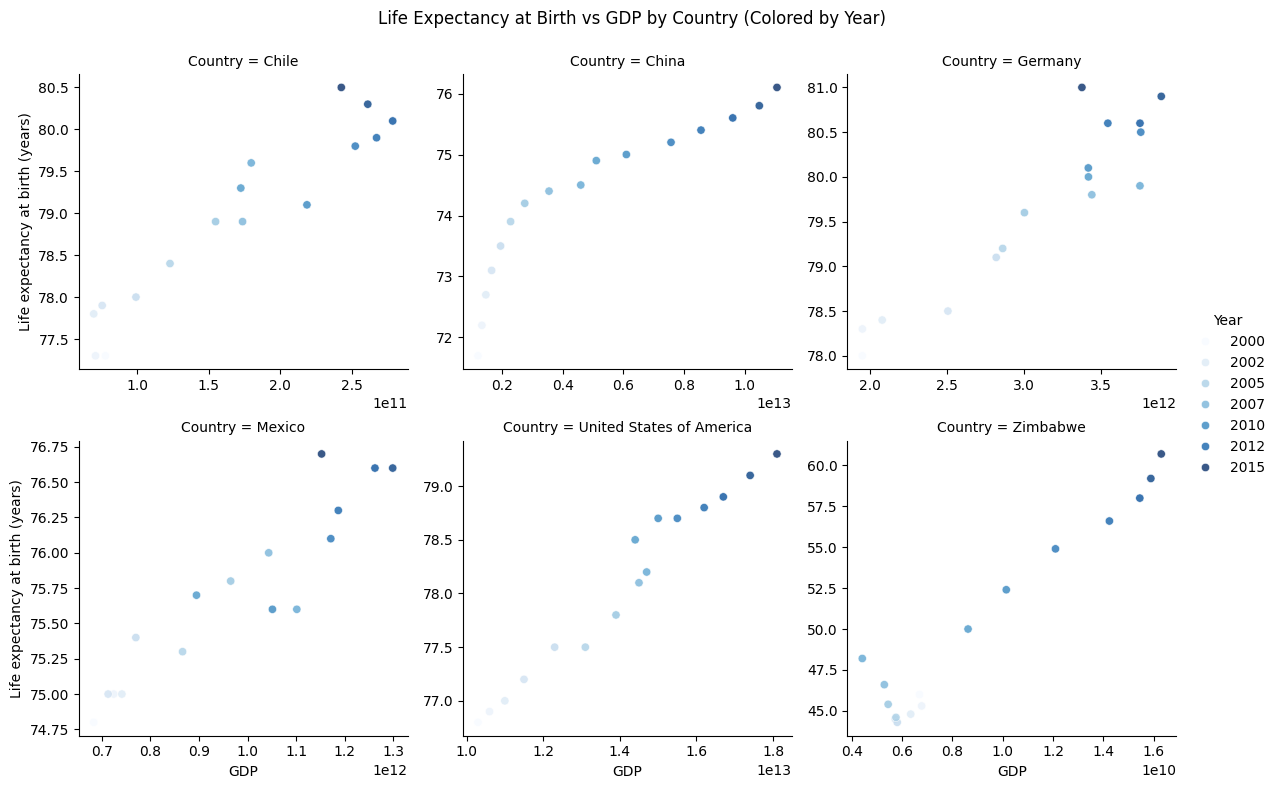

In [ ]:
# Create a 2x3 grid of scatter plots
g = sns.FacetGrid(
    main_df,
    col="Country",  # Facet by country
    col_wrap=3,  # Arrange into 2 rows and 3 columns
    height=4,  # Size of each plot
    sharex=False,  # Allow each subplot to have its own x-axis range
    sharey=False   # Allow each subplot to have its own y-axis range
)

# Add scatter plots with hue
g.map_dataframe(
    sns.scatterplot,
    x='GDP',
    y='Life expectancy at birth (years)',
    hue='Year',
    palette='Blues',
    alpha=0.8
)

# Add a legend (shared across all facets)
g.add_legend(title="Year")

# Adjust layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Life Expectancy at Birth vs GDP by Country (Colored by Year)")
plt.show()


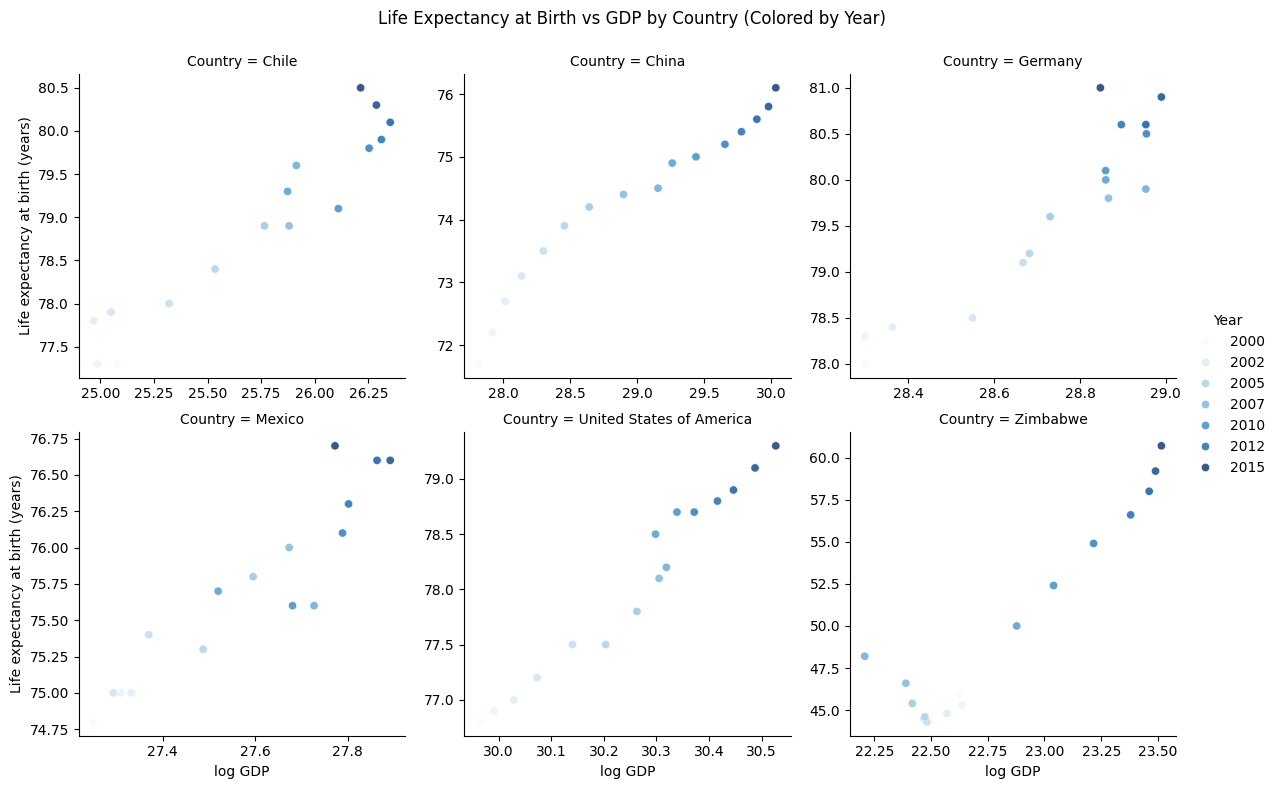

In [107]:
# Create a 2x3 grid of scatter plots
g = sns.FacetGrid(
    main_df,
    col="Country",  # Facet by country
    col_wrap=3,  # Arrange into 2 rows and 3 columns
    height=4,  # Size of each plot
    sharex=False,  # Allow each subplot to have its own x-axis range
    sharey=False   # Allow each subplot to have its own y-axis range
)

# Add scatter plots with hue
g.map_dataframe(
    sns.scatterplot,
    x='log GDP',
    y='Life expectancy at birth (years)',
    hue='Year',
    palette='Blues',
    alpha=0.8
)

# Add a legend (shared across all facets)
g.add_legend(title="Year")

# Adjust layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Life Expectancy at Birth vs GDP by Country (Colored by Year)")
plt.show()

After looking at the the relationship between GDP and Life Expectancy at Birth, some general trends become apparent. 
1. As GDP increases, Life Expectancy at Birth also generally increases. The exception to this is Zimbabwe
2. Generally we see that as the Year increases, Both GDP and Life Expectancy grow together. This implies that as time goes on, standard of living has improved across the globe. However, this trend is contradicted by most of the countries at some point. It only holds consistently true for the USA and China. For other countries, this trend is somewhat apparent but inconsistent. 

Graphing both log GDP and Life expectancy together on the same graph doesn't show much comparability because the scales are too fart apart. We can normalize the data to get a better understanding of the trends. **However, I would not use the normalized data for any inference.** The value of normalizing her is just to better understand the trends and the focus of any inferential analysis I will conduct.

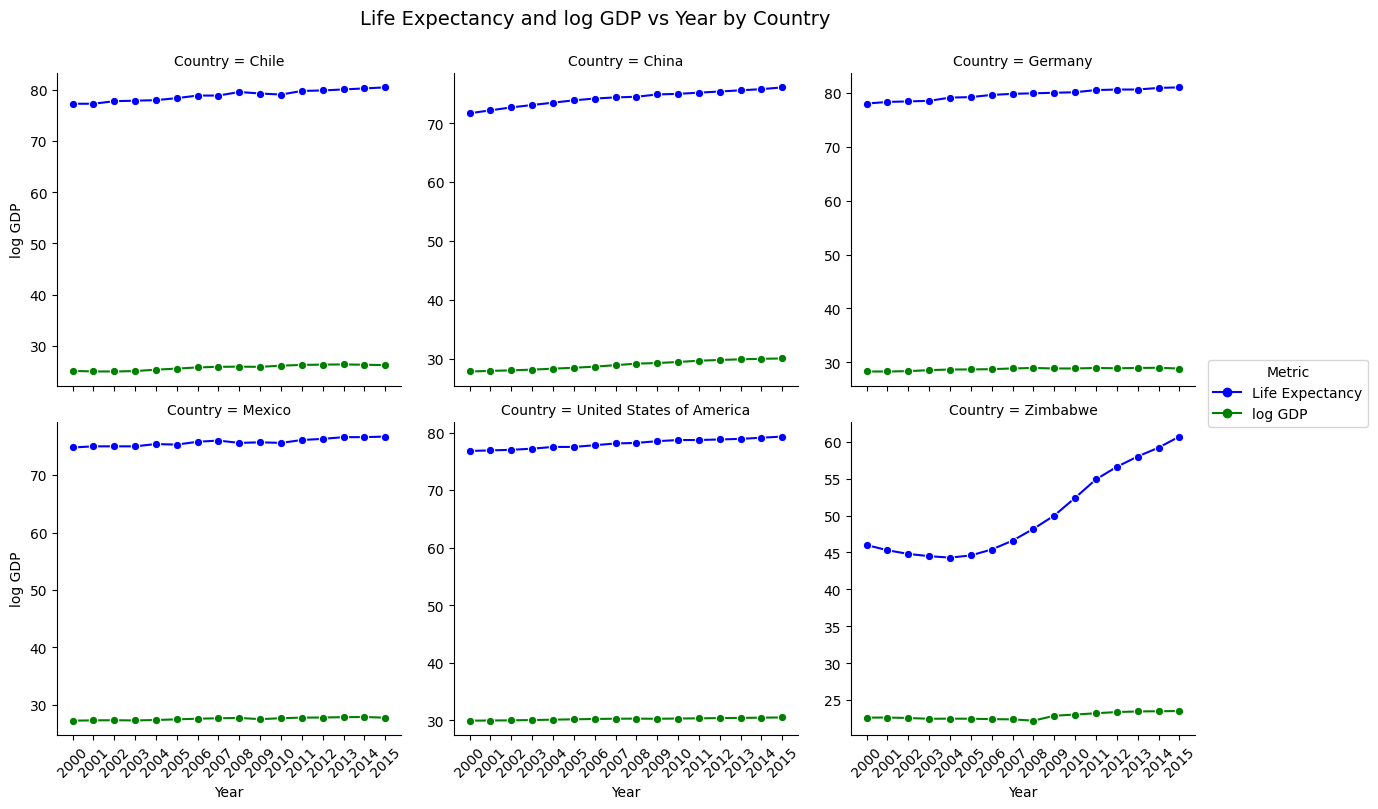

In [116]:
# Create a 2x3 FacetGrid
g = sns.FacetGrid(
    main_df,
    col="Country",  # Facet by country
    col_wrap=3,  # Arrange in 2 rows and 3 columns
    height=4,  # Size of each plot
    sharey=False  # Allow different y-axis ranges for each country
)

# Add Life Expectancy line
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Life expectancy at birth (years)",
    label="Life Expectancy",
    color="blue",
    marker="o"
)

# Add log GDP line
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="log GDP",
    label="log GDP",
    color="green",
    marker="o"
)

 # Customize the axes
for ax in g.axes.flat:
    # Set discrete ticks for the x-axis
    ax.set_xticks(main_df['Year'].unique())
    ax.set_xticklabels(main_df['Year'].unique(), rotation=45)  # Rotate labels for better visibility

# Manually add a single shared legend
from matplotlib.lines import Line2D

custom_legend = [
    Line2D([0], [0], color="blue", marker="o", label="Life Expectancy"),
    Line2D([0], [0], color="green", marker="o", label="log GDP")
]
g.fig.legend(
    handles=custom_legend,
    loc="center right",
    title="Metric",
    bbox_to_anchor=(1.15, 0.5),
    frameon=True
)

# Adjust layout
g.fig.subplots_adjust(top=0.9, right=1)  # Leave space for the legend
g.fig.suptitle("Life Expectancy and log GDP vs Year by Country", fontsize=14)
plt.show()


Below is the normalized plot. We normalized the log GDP data as normalization is more effect and useful when the data being normalized is not skewed.

In [118]:
main_df['Normalized log GDP'] = (main_df['log GDP'] - main_df['log GDP'].min()) / (main_df['log GDP'].max() - main_df['log GDP'].min())
main_df['Normalized Life Expectancy'] = (main_df['Life expectancy at birth (years)'] - main_df['Life expectancy at birth (years)'].min()) / (
    main_df['Life expectancy at birth (years)'].max() - main_df['Life expectancy at birth (years)'].min()
)

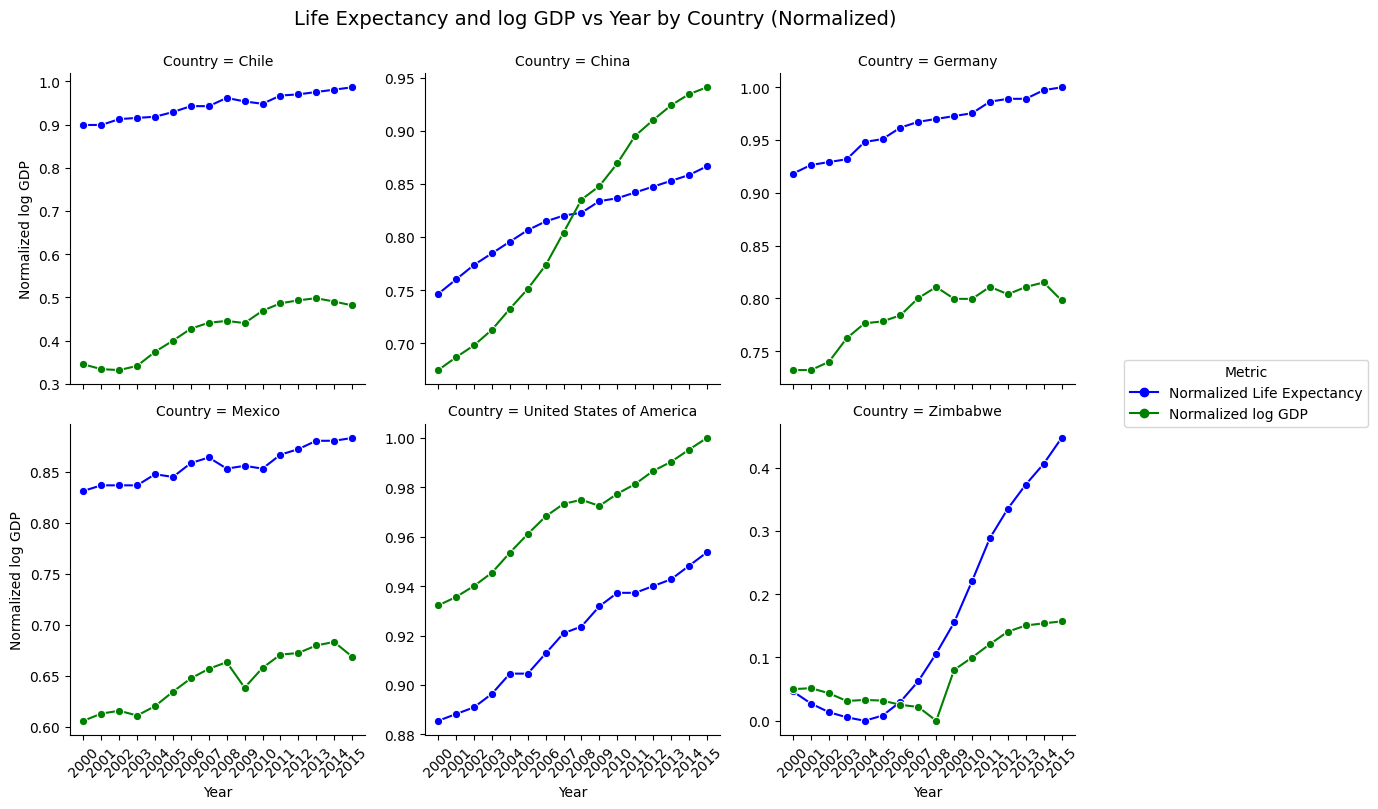

In [120]:
# Create a 2x3 FacetGrid
g = sns.FacetGrid(
    main_df,
    col="Country",  # Facet by country
    col_wrap=3,  # Arrange in 2 rows and 3 columns
    height=4,  # Size of each plot
    sharey=False  # Allow different y-axis ranges for each country
)

# Add Life Expectancy line
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Normalized Life Expectancy",
    label=" Normalized Life Expectancy",
    color="blue",
    marker="o"
)

# Add log GDP line
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Normalized log GDP",
    label="Normalized log GDP",
    color="green",
    marker="o"
)

 # Customize the axes
for ax in g.axes.flat:
    # Set discrete ticks for the x-axis
    ax.set_xticks(main_df['Year'].unique())
    ax.set_xticklabels(main_df['Year'].unique(), rotation=45)  # Rotate labels for better visibility

# Manually add a single shared legend
from matplotlib.lines import Line2D

custom_legend = [
    Line2D([0], [0], color="blue", marker="o", label="Normalized Life Expectancy"),
    Line2D([0], [0], color="green", marker="o", label="Normalized log GDP")
]
g.fig.legend(
    handles=custom_legend,
    loc="center right",
    title="Metric",
    bbox_to_anchor=(1.15, 0.5),
    frameon=True
)

# Adjust layout
g.fig.subplots_adjust(top=0.9, right=0.9)  # Leave space for the legend
g.fig.suptitle("Life Expectancy and log GDP vs Year by Country (Normalized)", fontsize=14)
plt.show()

It becomes clear in the above plots that there are clear upward trend in both GDP and Life expectancy over time. While there area some fluctuations that contradict this trend, the overall trends are mostly positive. Futhermore, both Life Expectancy and GDP  have a proportional relationship generally or a positive correlation. As one goes up, the other tends to increase generally as well. While we cannot make any causal claims with this data, we can recognize this positive relationship. 

We also have a very limited data set. By controlling for more feature like major events over time, it would be easier to explain the inconsistencies in the data we see. Some of these events we can recognize very clearly. For example, most of the countries have a dip in GDP during the period of the 2008 recession even though life expectancy increases in spite of this. This might imply that while the variables are very closely correlated, they are do not have a directly causal relationship. They might both be correlated with other strongly related features, but a dip in GDP does not automatically and distinctively cause a dip in life expectancy. 

Other country characteristics might help explain the differences. These could be financial regulations, country specific events, and social attitudes and behaviors. For example, we see that Germany has more fluctuations in GDP over time despite relative consistent increases in life expectancy. Alternatively, Zimbabwe has a growth in life expectancy that is much faster thant other countries relative to GDP, and this has been made apparent from even the first few visualizations. 

If we want to try and building a linear model to represent the relationship between Life Expectancy and GDP, we can at most control for year and country in the model. This in fact, would make this data set suitable for a rather simple and limited fixed-effects analysis. However, the only clear event that I see, being the 2008 recession doesn't appear visually to have a very stark "impact" on tierh life expectancy or GDP. I might conduct such an anlysis as an exploratory practice regardless.

# Analysis and Conclusions